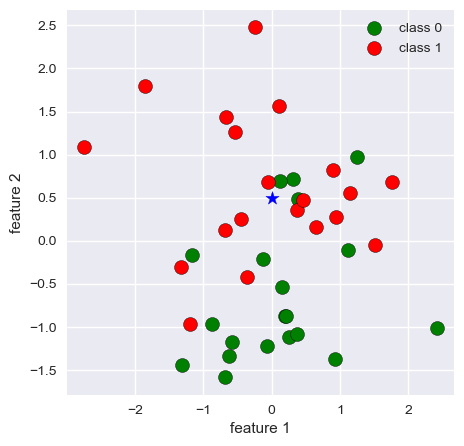

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

X, y = make_blobs(n_samples = 40, n_features = 2, centers = 2,cluster_std = 0.8, random_state = 5)
X_test = np.array([[0],[0.5]]).T
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.style.use('seaborn')
plt.figure(figsize = (5,5))
plt.scatter(X[y==0,0], X[y==0,1], c= "green", marker= 'o',s=100,edgecolors='black')
plt.scatter(X[y==1,0], X[y==1,1], c= "red", marker= 'o',s=100,edgecolors='black')

plt.scatter(X_test[0,0],X_test[0,1],c="blue",marker='*',s=100)
plt.legend(["class 0","class 1"])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [11]:
classifier = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
classifier.fit(X, Y)
pred = classifier.predict(X_test)
print(pred)

[1]


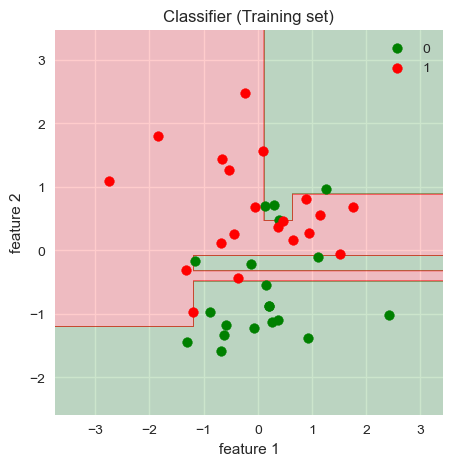

In [12]:
X_set, y_set = X, Y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (5,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for j in np.unique(y_set):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['green', 'red'][j], label = j)
plt.title('Classifier (Training set)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

[Text(0.4642857142857143, 0.9166666666666666, 'X[1] <= -0.08\nentropy = 1.0\nsamples = 40\nvalue = [20, 20]'),
 Text(0.2857142857142857, 0.75, 'X[0] <= -1.184\nentropy = 0.629\nsamples = 19\nvalue = [16, 3]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[1] <= -1.203\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07142857142857142, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.42857142857142855, 0.5833333333333334, 'X[1] <= -0.486\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.35714285714285715, 0.4166666666666667, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.5, 0.4166666666666667, 'X[1] <= -0.319\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.42857142857142855, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6428571428571429,

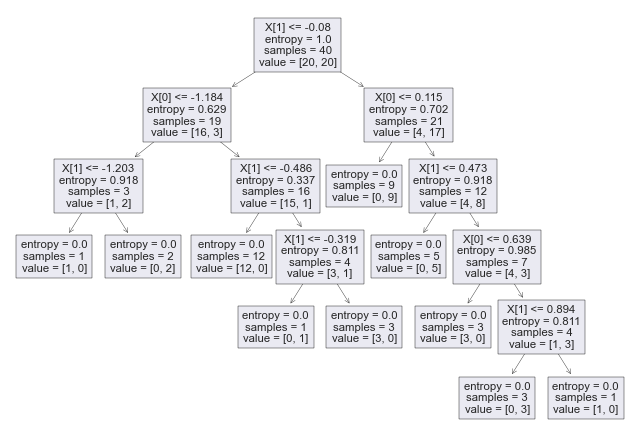

In [10]:
tree.plot_tree(classifier)

# ROC curve

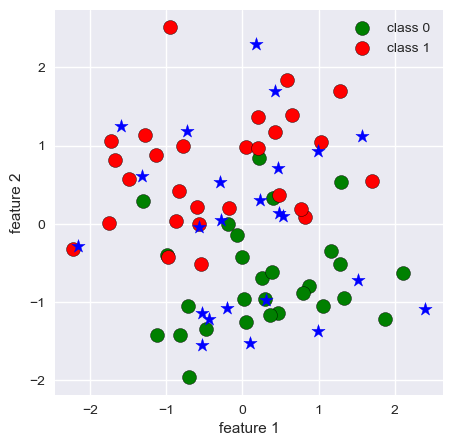

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

import warnings
warnings.filterwarnings('ignore')


X, y = make_blobs(n_samples = 80, n_features = 2, centers = 2,cluster_std = 0.5, random_state = 5)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.style.use('seaborn')
plt.figure(figsize = (5,5))
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c= "green", marker= 'o',s=100,edgecolors='black')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c= "red", marker= 'o',s=100,edgecolors='black')
plt.scatter(X_test[:,0],X_test[:,1],c="blue",marker='*',s=100)
plt.legend(["class 0","class 1"])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

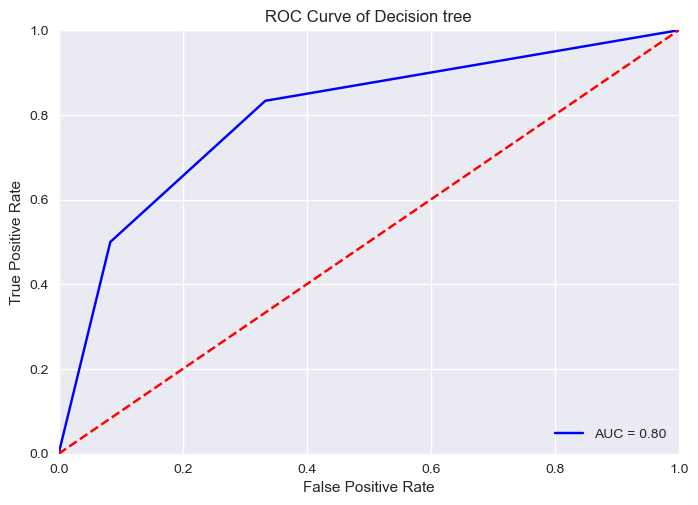

In [10]:
classifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=2)
classifier.fit(X_train,y_train)

y_scores = classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision tree')
plt.show()

In [11]:
threshold

array([2.        , 1.        , 0.75      , 0.07692308])